# **Just Watch**

## **Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)

## **Fetching Movie URL's**

In [ ]:
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)

# url_list

## **Scrapping Movie Title**

In [ ]:
movie_titles = []
for movie_page in url_list:
  movie_page = fetch_movie_urls(movie_page)
  title = movie_page.find('h1',class_='title-detail-hero__details__title').get_text(strip=True)
  movie_titles.append(title)

# movie_titles

## **Scrapping release Year**

In [ ]:
movie_release_year = []
for movie_page in url_list:
  movie_page = fetch_movie_urls(movie_page)
  release_year= movie_page.find('span', class_='release-year').get_text(strip=True)
  release_year = release_year.strip('()')
  movie_release_year.append(release_year)

# movie_release_year

## **Scrapping Genres**

In [ ]:
movie_genres = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      genre_heading = movie_page.find('h3', string='Genres')
      genre_value = genre_heading.find_next('div', class_='detail-infos__value').find('span').get_text(strip=True)
      movie_genres.append(genre_value)
    except AttributeError:
      movie_genres.append("Not Found")

# movie_genres

## **Scrapping IMBD Rating**

In [ ]:
IMDB_Rating = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      imdb = movie_page.find('span', class_='imdb-score')
      imdb_value = imdb.get_text(strip=True)[0:3]
      IMDB_Rating.append(imdb_value)
    except AttributeError:
        IMDB_Rating.append("Not Found")

# IMDB_Rating

## **Scrapping Runtime/Duration**

In [ ]:
Duration = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
        runtime = movie_page.find('h3', string='Runtime')
        runtime_value = runtime.find_next('div', class_='detail-infos__value').get_text(strip=True)
        Duration.append(runtime_value)
    except AttributeError:
        Duration.append(0)

# Duration

## **Scrapping Age Rating**

In [ ]:
Age_Rating = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      age_rt = movie_page.find('h3', string='Age rating')
      age_rt_value = age_rt.find_next('div', class_='detail-infos__value').get_text(strip=True)
      Age_Rating.append(age_rt_value)
    except AttributeError:
        Age_Rating.append("No Rating")

# Age_Rating

## **Fetching Production Countries Details**

In [ ]:
Production_Country = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
      prod_count = movie_page.find('h3', string=' Production country ')
      prod_count_value = prod_count.find_next('div', class_='detail-infos__value').get_text(strip=True)
      Production_Country.append(prod_count_value)
    except AttributeError:
      Production_Country.append("N/A")

# Production_Country

## **Fetching Streaming Service Details**

In [ ]:
stream_list = []
for movie_page in url_list:
    movie_page = fetch_movie_urls(movie_page)

    try:
        img_tags = movie_page.find_all('img', class_='offer__icon')
        stream_services = set()
        for img_tag in img_tags:
            stream_services.add(img_tag['alt'])
        if not stream_services:
            stream_list.append(["No streaming service found"])
        else:
            stream_list.append(list(stream_services))
    except AttributeError:
        stream_list.append(["No streaming service found"])


## **Now Creating Movies DataFrame**

In [ ]:
movies_data = {"Title":movie_titles,"Release Year":movie_release_year,"Genre":movie_genres,"IMDB Rating":IMDB_Rating,"Duration":Duration,"Age Rating":Age_Rating,"Production Country":Production_Country,"Available on":stream_list,"Just Watch URL":url_list}
movies_data_df=pd.DataFrame(movies_data)
movies_data_df

## **Scraping TV  Show Data**

In [ ]:
def fetch_tvshow_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_tvshow_urls(url)

## **Fetching Tv shows Url details**

In [ ]:
tv_show_links = soup.find_all('a', href=True)
tv_show_urls = [link['href'] for link in tv_show_links if '/tv-show/' in link['href']]

tv_show_url_list=[]
for x in tv_show_urls:
  tv_show_url_list.append('https://www.justwatch.com'+x)

# tv_show_url_list

## **Fetching Tv Show Title details**

In [ ]:
tv_show_titles = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)
  tv_show_title=tv_show_page.find('h1', class_='title-detail-hero__details__title').get_text(strip=True)
  tv_show_titles.append(tv_show_title)

# tv_show_titles

## **Fetching Release Year**

In [ ]:
tv_show_release_years = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)
  tv_show_release_year = tv_show_page.find('span',class_='release-year').get_text(strip=True)
  tv_show_release_years.append(tv_show_release_year[1:5])

# tv_show_release_years

## **Fetching TV Show Genre Details**

In [ ]:
tv_show_genres = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  tv_show_genre_heading=tv_show_page.find('h3',string='Genres')

  tv_show_genre = tv_show_genre_heading.find_next('div', class_='detail-infos__value').find('span').get_text(strip=True)
  tv_show_genres.append(tv_show_genre)

# tv_show_genres

## **Fetching IMDB Rating Details**

In [ ]:
IMDB_rating_tv_show = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    imdb_rating_tv = tv_show_page.find('span', class_='imdb-score')
    imdb_tv_value=imdb_rating_tv.get_text(strip=True)[0:3]
    IMDB_rating_tv_show.append(imdb_tv_value)
  except AttributeError:
    IMDB_rating_tv_show.append("Not Found")

# IMDB_rating_tv_show

## **Fetching Age Rating Details**

In [ ]:
Age_Rating_TVS = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    age_rating_show = tv_show_page.find('h3',string='Age rating')
    age_rating_show_value= age_rating_show.find_next('div',class_='detail-infos__value').get_text(strip=True)
    Age_Rating_TVS.append(age_rating_show_value)

  except AttributeError:
    Age_Rating_TVS.append("No Rating")


# Age_Rating_TVS

## **Fetching Production Country details**

In [ ]:
Production_Country_TVS= []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    tv_show_country = tv_show_page.find('h3',string=' Production country ')
    tv_show_country_value= tv_show_country.find_next('div',class_= 'detail-infos__value').get_text(strip=True)
    Production_Country_TVS.append(tv_show_country_value)

  except AttributeError:
    Production_Country_TVS.append('N/A')

# Production_Country_TVS

## **Fetching Streaming Service details**

In [ ]:
Streaming_Services_TVS = []
for tv_show in tv_show_url_list:
    tv_show_page = fetch_tvshow_urls(tv_show)

    try:
        img_tags = tv_show_page.find_all('img', class_='offer__icon')
        stream_services_tvs = set()
        for img_tag in img_tags:
            stream_services_tvs.add(img_tag['alt'])
        if not stream_services_tvs:
            Streaming_Services_TVS.append(["No streaming service found"])
        else:
            Streaming_Services_TVS.append(list(stream_services_tvs))
    except AttributeError:
        Streaming_Services_TVS.append(["No streaming service found"])

# Streaming_Services_TVS

## **Fetching Duration Details**

In [ ]:
Duration_TVS = []
for tv_show in tv_show_url_list:
  tv_show_page = fetch_tvshow_urls(tv_show)

  try:
    runtime_tvs = tv_show_page.find('h3', string='Runtime')
    runtime_value_tvs = runtime_tvs.find_next('div', class_='detail-infos__value').get_text(strip=True)
    Duration_TVS.append(runtime_value_tvs)
  except AttributeError:
    Duration_TVS.append(0)

# Duration_TVS

## **Creating TV Show DataFrame**

In [ ]:
tv_show_data = {"Title":tv_show_titles,"Release Year":tv_show_release_years,"Genre":tv_show_genres,"IMDB Rating":IMDB_rating_tv_show,"Duration":Duration_TVS,"Age Rating":Age_Rating_TVS,"Production Country":Production_Country_TVS,"Available on":Streaming_Services_TVS,"Just Watch URL":tv_show_url_list}
tv_show_data_df=pd.DataFrame(tv_show_data)
tv_show_data_df

## **Data Filtering & Analysis**

In [ ]:
#Concatinating both the dataframes to form 1 for futher analysis

movies_shows = pd.concat([movies_data_df,tv_show_data_df]).reset_index(drop=True)

In [ ]:
#adding a new colum to represent if the record belongs to movie or show dataset

movies_shows['Type'] = 'Movie'  # Seting default to 'Movie'
movies_shows.loc[movies_shows.index >= len(movies_data_df), 'Type'] = 'Show'  # Setting 'Show' for rows from tv_show_data_df

In [ ]:
                       #Data Cleaning and Filtering

#Converting date string to int for filtering
movies_shows['Release Year'] = movies_shows['Release Year'].astype(int)

# Filtering movies and TV shows released in the last 2 years (from the current date).

movies_shows = movies_shows[(movies_shows['Release Year'] >= pd.Timestamp.today().year-2) & (movies_shows['Release Year'] <= pd.Timestamp.today().year)]

#cleaning and converting IMDB column for futher analysis
movies_shows = movies_shows[movies_shows['IMDB Rating'] != 'Not Found']
movies_shows['IMDB Rating'] = movies_shows['IMDB Rating'].astype(float)

# Movies and TV Shows released in the last 2 years and with an IMDb rating of 7 or higher.

movies_shows = movies_shows[movies_shows['IMDB Rating'] > 7].reset_index(drop=True)

movies_shows

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
#Mean IMDB rating for both Movies and Tv Shows
Average_IMDB = round(movies_shows['IMDB Rating'].mean(),2)
# Average_IMDB

#Mean IMDB rating Movies and Tv Shows wise
Average_Individual_IMDB = movies_shows.groupby('Type')['IMDB Rating'].mean().round(2)
# Average_Individual_IMDB

## **Analyzing Top Genres**

In [ ]:
#Examining Top Genres across movies and tvshows

genre_count = {}

for genre in movies_shows['Genre']:
  genre = genre.split(", ")
  count = 1
  for each_genre in genre:
    if each_genre not in genre_count:
      genre_count[each_genre] = count
    else:
      genre_count[each_genre] += 1

# genre_count

genre_count_df = pd.DataFrame({'Genre':genre_count.keys(),'Count':genre_count.values()})
genre_count_df = genre_count_df.sort_values(by='Count',ascending = False).reset_index(drop=True)

# genre_count_df.head()

In [ ]:
#Let's Visvalize it using word cloud

from wordcloud import WordCloud

word_counts = genre_count_df.set_index('Genre')['Count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# - Determining the streaming service with the most significant number of offerings.

streaming_services = []
for service in movies_shows['Available on']:
    if len(service) > 1:
        for service_count in service:
            service_split = service_count.split(",")
            streaming_services.append(service_split)
    else:
        streaming_services.append(service)

streaming_services_series = pd.Series(streaming_services).value_counts().reset_index()

streaming_service_counts = streaming_services_series.rename(columns={'index': 'Streaming Service', 0: 'Count'})


# Converting the 'Streaming Service' to string type as needed
streaming_service_counts['Streaming Service'] = streaming_service_counts['Streaming Service'].astype(str)

# Removing square brackets and any extra whitespace from 'Streaming Service' column as needed

streaming_service_counts['Streaming Service'] = streaming_service_counts['Streaming Service'].str.replace('[', '').str.replace(']', '').str.strip()
streaming_service_counts['Streaming Service'] = streaming_service_counts['Streaming Service'].str.strip("' ")

streaming_service_counts.head()

,Streaming Service,count
0,Netflix,20
1,Amazon Prime Video,17
2,Hotstar,14
3,Bookmyshow,10
4,Amazon Video,10


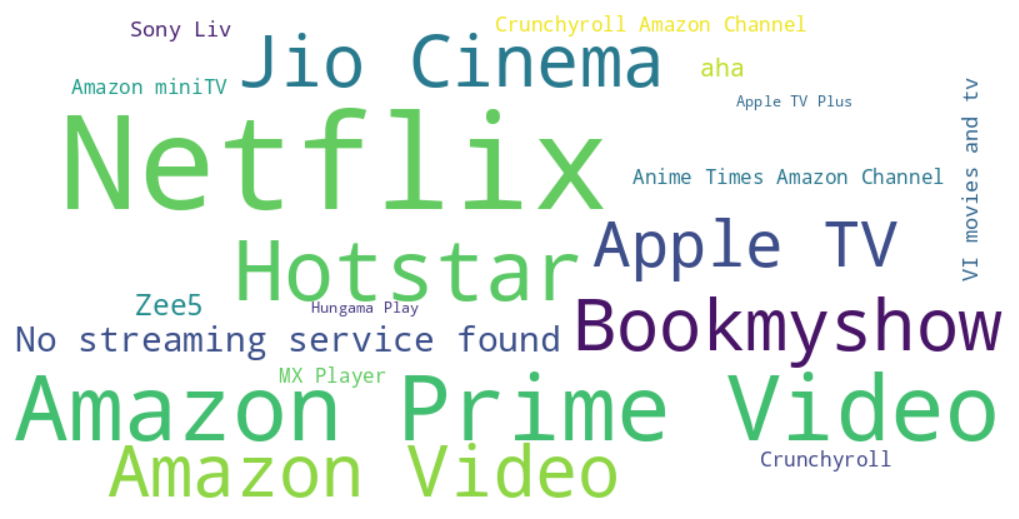

In [ ]:
#Generating a Wordcloud from streaming services

text = dict(zip(streaming_service_counts['Streaming Service'], streaming_service_counts['count']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text)
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Data Export**

In [ ]:
#saving final movies dataframe as Final Movies in csv format
movies_data_df_to_csv = movies_data_df.to_csv('Final_Movies.csv', index=False)

movies_data_df_to_csv

#saving final tvshows dataframe as Final TV Shows in csv format

tv_show_data_df_to_sc = tv_show_data_df.to_csv('Final_TV_Shows.csv', index=False)

tv_show_data_df_to_sc

In [ ]:
#saving filter data as Filter Data in csv format
movies_shows_to_csv = movies_shows.to_csv('Final_Filtered_Data.csv', index=False)

movies_shows_to_csv

# **Dataset Drive Link (View Access with Anyone) -**

In [ ]:
#Link to final csv files:

# 1. Final_Movies.csv
# 2. Final_TV_Shows.csv
# 3. Final_Filtered_Data.csv

https://drive.google.com/drive/folders/1vcZpv6rsF70vNr_PaiFF12397zhDEhBk?usp=sharing